In [1]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bin_data = pd.read_csv('datasets/bin_data.csv')
bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
multi_data = pd.read_csv('datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)
le1_classes_ = np.load('labels/le1_classes.npy',allow_pickle=True)
le2_classes_ = np.load('le2_classes.npy',allow_pickle=True)

# **Linear Support Vector Machine Classifier (Binary Classification)**

In [3]:
# importing library for support vector machine classifier
from sklearn.svm import SVC

In [4]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [5]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [6]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [7]:
pkl_filename = "./models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk") 

In [8]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  96.69460849685655


In [9]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



# **Quadratic Support Vector Machine Classifier (Binary Classification)**

In [10]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [11]:
pkl_filename = "./models/qsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [12]:
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  95.71029402425859


In [13]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.92      0.95     14720
      normal       0.93      0.99      0.96     16774

    accuracy                           0.96     31494
   macro avg       0.96      0.95      0.96     31494
weighted avg       0.96      0.96      0.96     31494



# **K-nearest-neighbor Classifier (Binary Classification)**

In [14]:
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [16]:
pkl_filename = "./models/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

In [17]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  98.5552803708643


In [18]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.98      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



# **Linear Discriminant Analysis Classifier (Binary Classification)**

In [19]:
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

LinearDiscriminantAnalysis()

In [21]:
pkl_filename = "./models/lda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")

In [22]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.70730932876104


In [23]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



# **Quadratic Discriminant Analysis Classifier (Binary Classification)**

In [24]:
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [25]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [26]:
pkl_filename = "./models/qda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [27]:
y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", ac)

QDA-Classifier Set-Accuracy is  70.47691623801359


In [28]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       1.00      0.37      0.54     14720
      normal       0.64      1.00      0.78     16774

    accuracy                           0.70     31494
   macro avg       0.82      0.68      0.66     31494
weighted avg       0.81      0.70      0.67     31494



# **Multi Layer Perceptron Classifier (Binary Classification)**

In [29]:
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

In [30]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [31]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [32]:
mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# summary of model layers
mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         4,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,751 (18.56 KB)

 Trainable params: 4,751 (18.56 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Ensure X_train and y_train are NumPy arrays with the correct data type (float32)
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

# Check for NaN or infinite values and replace them with 0
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)

# Normalize the features to the range [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Training the model on the training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000, validation_split=0.2)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5179 - loss: 0.6966 - val_accuracy: 0.8739 - val_loss: 0.5728
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8917 - loss: 0.5405 - val_accuracy: 0.9159 - val_loss: 0.4485
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9155 - loss: 0.4220 - val_accuracy: 0.9243 - val_loss: 0.3449
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9343 - loss: 0.3242 - val_accuracy: 0.9543 - val_loss: 0.2681
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9554 - loss: 0.2524 - val_accuracy: 0.9552 - val_loss: 0.2165
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9557 - loss: 0.2063 - val_accuracy: 0.9579 - val_loss: 0.1831
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9586 - loss: 0.1749 - val_accuracy: 0.9609 - val_loss: 0.1610
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9608 - loss: 0.1554 - val_accuracy: 0.9631 - 

In [37]:
filepath = './models/mlp_binary.json'
weightspath = './weights/mlp_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [38]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Ensure X_test and y_test are NumPy arrays with the correct data type (float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Check for NaN or infinite values and replace them with 0
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

# Normalize the features using the same scaler that was applied to X_train
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)  # Use the same scaler fitted on X_train if needed

# Evaluate the model on the test dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.9738 - loss: 0.0742
Test results - Loss: 0.07040970027446747 - Accuracy: 97.52968549728394


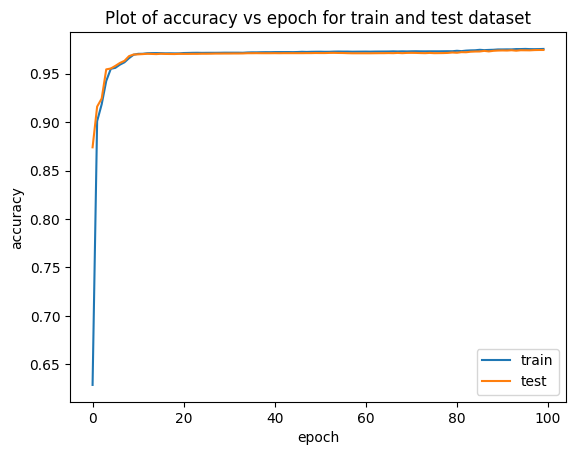

In [41]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_accuracy.png')
plt.show()

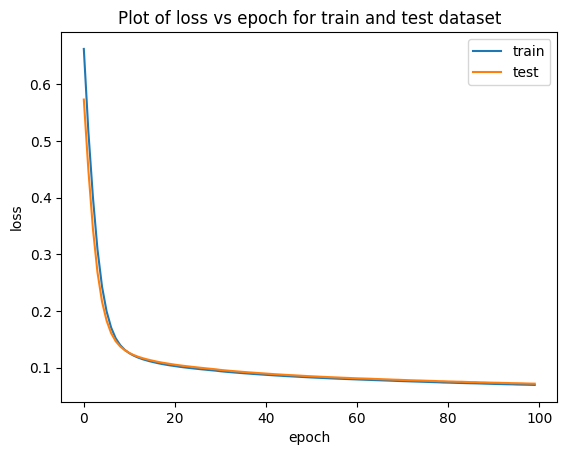

In [42]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_loss.png')
plt.show()

In [43]:
# representation of model layers
from keras.utils import plot_model
plot_model(mlp, to_file='plots/mlp_binary.png', show_shapes=True,)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


# **Long Short-Term Memory Classifier (Binary Classification)**

In [44]:
# importing library for LSTM layers
from keras.layers import LSTM

In [45]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [46]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [47]:
X_train = X_train.to_numpy()

In [48]:
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [49]:
lst = Sequential() # initializing model

# input layer and LSTM layer with 50 neurons
lst.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# outpute layer with sigmoid activation
lst.add(Dense(1, activation='sigmoid'))

c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
# summary of model layers
lst.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 93, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 93, 1)          │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Example: Generate dummy data
samples, timesteps, features = 1000, 10, 5
x_train = np.random.random((samples, timesteps, features))
y_train = np.random.randint(0, 2, (samples,))  # Binary labels (0 or 1)

# Define x_test and y_test
x_test = np.random.random((200, timesteps, features))
y_test = np.random.randint(0, 2, (200,))

# Preprocessing: Flatten the 3D structure to apply MinMaxScaler
x_train_reshaped = x_train.reshape(-1, features)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped)

# Reshape the scaled data back to the original 3D structure
x_train = x_train_scaled.reshape(samples, timesteps, features)

# Similarly, apply scaling to x_test
x_test_reshaped = x_test.reshape(-1, features)
x_test_scaled = scaler.transform(x_test_reshaped)
x_test = x_test_scaled.reshape(x_test.shape[0], timesteps, features)

# Check and reshape y_train if needed
if len(y_train.shape) == 1:
    y_train = y_train.reshape(-1, 1)

# Check and reshape y_test if needed
if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)

# Define the model
model = Sequential([
    LSTM(50, input_shape=(timesteps, features)),  # LSTM layer
    Dense(1, activation='sigmoid')               # Single output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=5000,  # Ensure this batch size fits your data and GPU/CPU memory
    validation_split=0.2
)

# Evaluate the model
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100:.2f}%')

c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5063 - loss: 0.6940 - val_accuracy: 0.5100 - val_loss: 0.6915
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5100 - loss: 0.6925 - val_accuracy: 0.5150 - val_loss: 0.6916
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5100 - loss: 0.6920 - val_accuracy: 0.5250 - val_loss: 0.6922
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5138 - loss: 0.6922 - val_accuracy: 0.5200 - val_loss: 0.6927
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5188 - loss: 0.6924 - val_accuracy: 0.5200 - val_loss: 0.6928
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5188 - loss: 0.6924 - val_accuracy: 0.5250 - val_loss: 0.6926
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5238 - loss: 0.6922 - val_accuracy: 0.5200 - val_loss: 0.6922
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5275 - loss: 0.6919 - val_accuracy: 0.5150 - val_los

In [57]:
x_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [58]:
filepath = './models/lst_binary.json'
weightspath = './weights/lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

In [59]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Example data
samples, timesteps, features = 1000, 10, 5
x_train = np.random.random((samples, timesteps, features))
y_train = np.random.randint(0, 2, (samples,))

x_test = np.random.random((200, timesteps, features))
y_test = np.random.randint(0, 2, (200,))

# Preprocess data
x_train_reshaped = x_train.reshape(-1, features)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped)
x_train = x_train_scaled.reshape(samples, timesteps, features)

x_test_reshaped = x_test.reshape(-1, features)
x_test_scaled = scaler.transform(x_test_reshaped)
x_test = x_test_scaled.reshape(x_test.shape[0], timesteps, features)

# Ensure y_train and y_test are correctly shaped
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Confirm data shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Define the model
model = Sequential([
    LSTM(50, input_shape=(timesteps, features)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=5000, validation_split=0.2)

# Evaluate the model
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f"Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100:.2f}%")

x_train shape: (1000, 10, 5)
y_train shape: (1000, 1)
x_test shape: (200, 10, 5)
y_test shape: (200, 1)
Epoch 1/100


c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5175 - loss: 0.6929 - val_accuracy: 0.5050 - val_loss: 0.6938
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5275 - loss: 0.6928 - val_accuracy: 0.4950 - val_loss: 0.6939
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5263 - loss: 0.6927 - val_accuracy: 0.4700 - val_loss: 0.6952
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5263 - loss: 0.6925 - val_accuracy: 0.4600 - val_loss: 0.6968
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5175 - loss: 0.6925 - val_accuracy: 0.4600 - val_loss: 0.6977
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5175 - loss: 0.6924 - val_accuracy: 0.4650 - val_loss: 0.6975
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5175 - loss: 0.6923 - val_accuracy: 0.4650 - val_loss: 0.6968
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5188 - loss: 0.6922 - val_accuracy: 0.4750 - val_loss: 0.6960
E

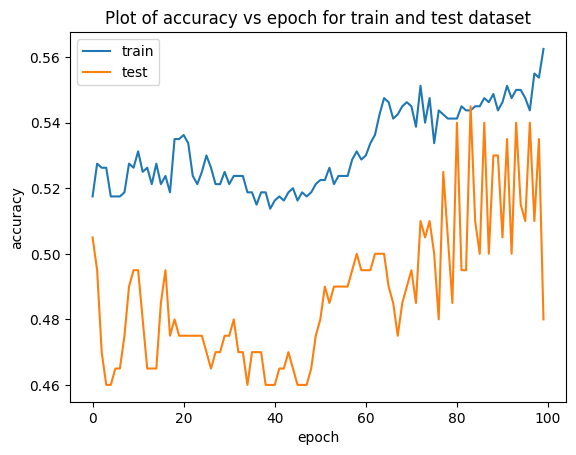

In [62]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

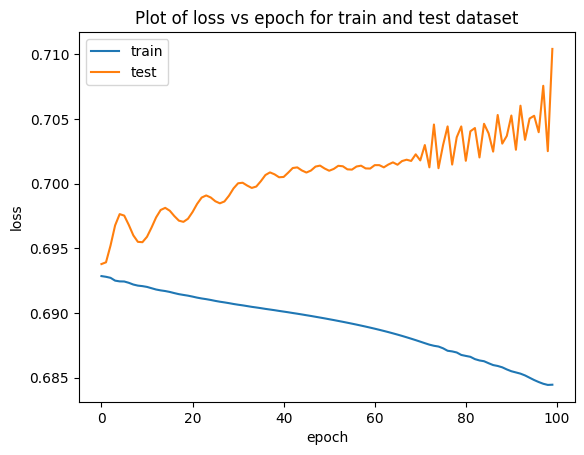

In [63]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_loss.png')
plt.show()

In [64]:
# representation of model layers
plot_model(lst, to_file='plots/lstm_binary.png', show_shapes=True,)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


# **Auto Encoder Classifier (Binary Classification)**

In [65]:
from keras.layers import Input
from keras.models import Model

In [66]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [67]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [68]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [69]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [70]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [71]:
# summary of model layers
autoencoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 93)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         4,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 93)             │         4,743 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,443 (36.89 KB)

 Trainable params: 9,443 (36.89 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Generate dummy data (Replace with your actual dataset)
samples, features = 1000, 50
X_train = np.random.random((samples, features))
X_test = np.random.random((200, features))

# Ensure the data is a NumPy array with dtype float32
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Check shapes and data types
print(f"X_train dtype: {X_train.dtype}, shape: {X_train.shape}")
print(f"X_test dtype: {X_test.dtype}, shape: {X_test.shape}")

# Define the autoencoder architecture
input_dim = X_train.shape[1]  # Number of features
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)  # Encoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)  # Decoder

# Build the autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(
    X_train,        # Input data (also used as target data for reconstruction)
    X_train,        # Target data
    epochs=100,     # Number of epochs
    batch_size=500, # Batch size
    validation_data=(X_test, X_test)  # Validation data for monitoring
).history

# Print the history keys to verify training progress
print("Training history keys:", history.keys())

X_train dtype: float32, shape: (1000, 50)
X_test dtype: float32, shape: (200, 50)
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 0.0936 - val_loss: 0.0911
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0924 - val_loss: 0.0896
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0901 - val_loss: 0.0883
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0890 - val_loss: 0.0872
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0877 - val_loss: 0.0863
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0865 - val_loss: 0.0856
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0857 - val_loss: 0.0850
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0851 - val_loss: 0.0845
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0847 - val_loss: 0.0841
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0839 - val_loss: 0.0838
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0836 - val_loss

In [74]:
filepath = './models/ae_binary.json'
weightspath = './weights/ae_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

In [75]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [76]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0829 - loss: 0.0576  
Test results - Loss: 0.05809123441576958 - Accuracy: 0.0949999988079071%


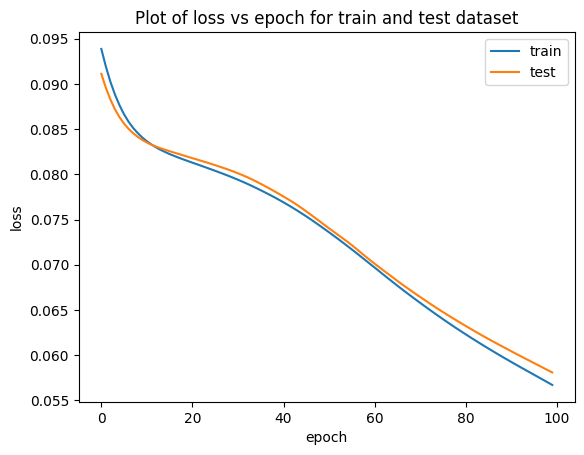

In [77]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_binary_loss.png')
plt.show()

Available metrics in history: dict_keys(['loss', 'val_loss'])


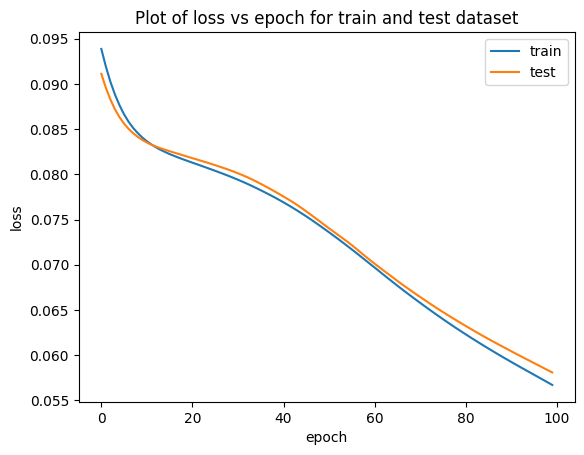

In [81]:
import matplotlib.pyplot as plt

# Print available keys in the history dictionary to see what metrics are being tracked
print("Available metrics in history:", history.keys())

# Use 'loss' and 'val_loss' for plotting the training and validation loss over epochs
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# Save the plot
plt.savefig('plots/ae_binary_loss.png')

# Display the plot
plt.show()

In [82]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_binary.png', show_shapes=True,)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [83]:
# calculating reconstruction error 
predictions = autoencoder.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [86]:
import numpy as np
import pandas as pd

# Generate predictions for the entire test set using the autoencoder
predictions = autoencoder.predict(X_test)

# Calculate the Mean Squared Error (MSE) for each test sample
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

# Ensure that y_test is a 1D array and matches the length of mse
y_test_flat = y_test.flatten()  # Flatten y_test to 1D if it's not already

# If y_test and mse have mismatched lengths, trim y_test to match the length of mse
if mse.shape[0] != y_test_flat.shape[0]:
    y_test_flat = y_test_flat[:len(mse)]

# Check the shapes before creating the DataFrame
print(f"Shape of mse: {mse.shape}")
print(f"Shape of y_test: {y_test_flat.shape}")

# Create a DataFrame if the shapes match
if mse.shape[0] == y_test_flat.shape[0]:
    error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test_flat})
    # Display the first few rows of the DataFrame
    print(error_df.head())
else:
    print("Shape mismatch between mse and y_test.")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
Shape of mse: (200,)
Shape of y_test: (200,)
   reconstruction_error  true_class
0              0.046141           1
1              0.066895           0
2              0.058154           0
3              0.048874           0
4              0.065160           0


In [87]:
error_df.describe()

,reconstruction_error,true_class
count,200.000000,200.000000
mean,0.058091,0.580000
std,0.008953,0.494797
min,0.034611,0.000000
25%,0.051589,0.000000
50%,0.057671,1.000000
75%,0.064215,1.000000
max,0.087369,1.000000


# **Linear Support Vector Machine Classifier (Multi-class Classification)**

In [88]:
X = multi_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = multi_data['intrusion'] # target attribute

In [89]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [90]:
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [91]:
# saving trained model to disk
pkl_filename = "./models/lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loade model from disk")
  

In [92]:
y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

LSVM-Classifier Multi-class Set-Accuracy is  95.24671365974471


In [93]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.95      0.96      0.96     11484
       Probe       0.86      0.79      0.82      2947
         R2L       0.61      0.60      0.60       274
         U2R       0.00      0.00      0.00        15
      normal       0.97      0.98      0.98     16774

    accuracy                           0.95     31494
   macro avg       0.68      0.67      0.67     31494
weighted avg       0.95      0.95      0.95     31494



c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# **Quadratic Support Vector Machine Classifier (Multi-class Classification)**

In [94]:
qsvm=SVC(kernel='poly',gamma='auto')
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [95]:
pkl_filename = "./models/qsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [96]:
y_pred=qsvm.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QSVM-Classifier Multi-class Set-Accuracy is ", ac)

QSVM-Classifier Multi-class Set-Accuracy is  92.86213246967677


In [97]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.96      0.94      0.95     11484
       Probe       0.96      0.61      0.74      2947
         R2L       0.00      0.00      0.00       274
         U2R       0.00      0.00      0.00        15
      normal       0.91      1.00      0.95     16774

    accuracy                           0.93     31494
   macro avg       0.56      0.51      0.53     31494
weighted avg       0.92      0.93      0.92     31494



c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# **K-nearest-neighbor Classifier (Multi-class Classification)**

In [98]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [99]:
pkl_filename = "./models/knn_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

In [100]:
y_pred=knn.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Multi-class Set-Accuracy is ", ac)

KNN-Classifier Multi-class Set-Accuracy is  98.28856290087


In [101]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.96      0.96      0.96      2947
         R2L       0.90      0.87      0.88       274
         U2R       0.40      0.13      0.20        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.85      0.79      0.80     31494
weighted avg       0.98      0.98      0.98     31494



# **Linear Discriminant Analysis Classifier (Multi-class Classification)**

In [102]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # training model on training dataset

LinearDiscriminantAnalysis()

In [103]:
pkl_filename = "./models/lda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")
  

In [104]:
y_pred = lda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  93.1923540991935


In [105]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.94      0.96      0.95     11484
       Probe       0.88      0.73      0.80      2947
         R2L       0.37      0.89      0.52       274
         U2R       0.03      0.47      0.06        15
      normal       0.97      0.95      0.96     16774

    accuracy                           0.93     31494
   macro avg       0.64      0.80      0.66     31494
weighted avg       0.94      0.93      0.94     31494



# **Quadratic Discriminant Analysis Classifier (Multi-class Classification)**

In [106]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [107]:
pkl_filename = "./models/qda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [108]:
y_pred = qda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Multi-class Set-Accuracy is ", ac)

QDA-Classifier Multi-class Set-Accuracy is  44.151266907982475


In [109]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.42      0.59     11484
       Probe       0.97      0.06      0.11      2947
         R2L       0.03      1.00      0.06       274
         U2R       0.00      0.00      0.00        15
      normal       0.49      0.52      0.50     16774

    accuracy                           0.44     31494
   macro avg       0.50      0.40      0.25     31494
weighted avg       0.71      0.44      0.49     31494



c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# **Multi Layer Perceptron Classifier (Multi-class Classification)**

In [110]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [111]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [112]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

c:\Users\kunal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [114]:
# summary of model layers
mlp.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 50)             │         4,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,955 (19.36 KB)

 Trainable params: 4,955 (19.36 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3721 - loss: 1.4446 - val_accuracy: 0.7985 - val_loss: 1.0195
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8035 - loss: 0.9249 - val_accuracy: 0.8230 - val_loss: 0.7009
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8277 - loss: 0.6543 - val_accuracy: 0.8572 - val_loss: 0.5334
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8613 - loss: 0.5075 - val_accuracy: 0.8691 - val_loss: 0.4450
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8659 - loss: 0.4327 - val_accuracy: 0.8726 - val_loss: 0.3883
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8731 - loss: 0.3752 - val_accuracy: 0.8934 - val_loss: 0.3469
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8936 - loss: 0.3342 - val_accuracy: 0.9178 - val_loss: 0.3148
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9189 - loss: 0.3056 - val_accuracy: 0.9273 - 

In [116]:
filepath = './models/mlp_multi.json'
weightspath = './weights/mlp_multi.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")
  
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [117]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9658 - loss: 0.0988
Test results - Loss: 0.0943673849105835 - Accuracy: 96.69778347015381%


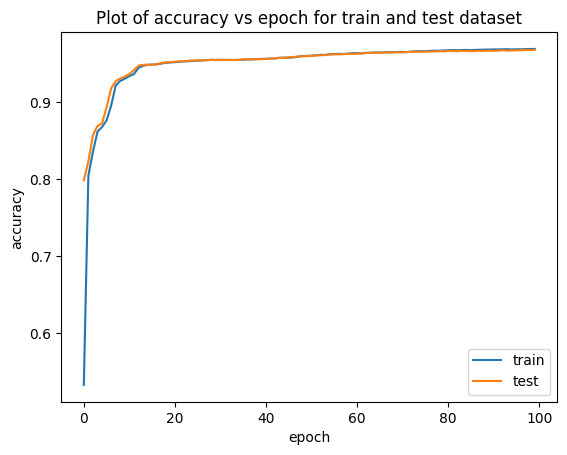

In [119]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

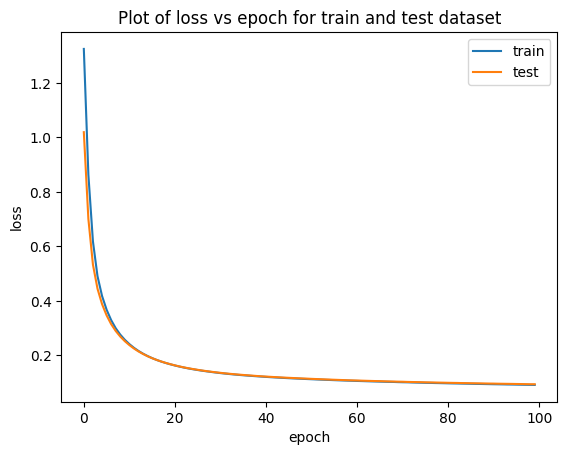

In [120]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/mlp_multi_loss.png')
plt.show()

In [121]:
# representation of model layers
plot_model(mlp, to_file='plots/mlp_multi.png', show_shapes=True,)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


# **Auto Encoder Classifier (Multi-class Classification)**

In [122]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

In [123]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

In [124]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [125]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [126]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [127]:
# summary of model layers
autoencoder.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 93)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │         4,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 93)             │         4,743 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,443 (36.89 KB)

 Trainable params: 9,443 (36.89 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
import numpy as np

# Ensure X_train and X_test are NumPy arrays and convert them to float32
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Check the shape of the data to ensure it's correct
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Train the model on the training dataset
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=500, validation_data=(X_test, X_test))

# If you want to access the history, you can use the following
history_dict = history.history

Shape of X_train: (94479, 93)
Shape of X_test: (31494, 93)
Epoch 1/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0965 - loss: 0.1218 - val_accuracy: 0.3048 - val_loss: 0.1061
Epoch 2/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5029 - loss: 0.1056 - val_accuracy: 0.6860 - val_loss: 0.1052
Epoch 3/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7057 - loss: 0.1046 - val_accuracy: 0.7429 - val_loss: 0.1049
Epoch 4/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7564 - loss: 0.1044 - val_accuracy: 0.7951 - val_loss: 0.1048
Epoch 5/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7907 - loss: 0.1044 - val_accuracy: 0.8078 - val_loss: 0.1048
Epoch 6/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8084 - loss: 0.1044 - val_accuracy: 0.8153 - val_loss: 0.1047
Epoch 7/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8188 - loss: 0.1047 - val_accuracy: 0.8257 - val_loss: 0.1047
Epoch 8/100
189/189 ━━━━━━━━━━━━━━━━━━

In [130]:
filepath = './models/ae_multi.json'
weightspath = './weights/ae_multi.h5'
if (not path.isfile(filepath)):  
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

In [131]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [132]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9433 - loss: 0.1044
Test results - Loss: 0.1045704036951065 - Accuracy: 94.43386197090149%


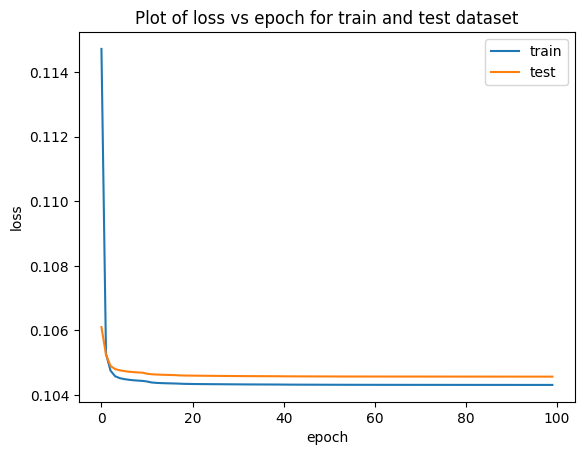

In [134]:
import matplotlib.pyplot as plt

# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# Save the plot
plt.savefig('plots/ae_multi_loss.png')

# Display the plot
plt.show()

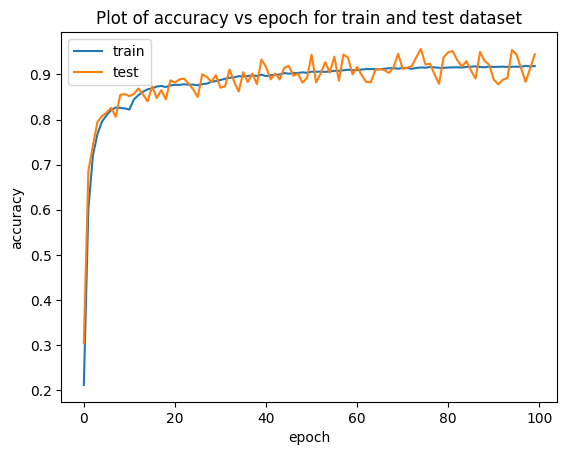

In [136]:
import matplotlib.pyplot as plt

# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# Save the plot
plt.savefig('plots/ae_multi_accuracy.png')

# Display the plot
plt.show()

In [137]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_multi.png', show_shapes=True,)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [138]:
# calculating reconstruction error
predictions = autoencoder.predict(X_test)

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [139]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [140]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104570,2.242840
std,0.043572,1.903732
min,0.040626,0.000000
25%,0.074501,0.000000
50%,0.083821,4.000000
75%,0.151404,4.000000
max,0.229786,4.000000
